<a href="https://colab.research.google.com/github/Dimisz/tensorflow_lectures/blob/main/CNN_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

# Theoretical Background

## Filters and Image Kernels

Filters are essentially an **image kernel**, which is a small matrix applied to an entire image.

**Applying filter** is:
* 'sliding' the kernel matrix across the entire image with a particular `stride`.
* multipying the image pixels by filter-weights
* <a href="https://setosa.io/ev/image-kernels/" target="_blank">Example of filters in action</a>

The process of applying a filter is sometimes called a **Convolution**. 

The point of CNN is that the network will figure out the weights and decide what **weights matter for image-classification**.


In the context of CNNs these filters are referred to as **convolution kernels**.

The process of passing them over an image is known as **convolution**.

## Convolutional Layers

**Why ANNs are not a good choice for working with images?**:
* Large amount of parameters (100 000 for 28X28 images).
* We have to flatten our images thus losing all the 2D information.
* Will only work on very similar, well-centered images.

(MNIST dataset is 28x28 and well-centered, so the ANN built on the dataset will not generalize well)


A convolutional layer is created when we apply *multiple image filters* to the input images.

The layer will then be trained to figure out **the best filter weight values**.

A CNN also helps to reduce parameters by focusing on **local connectivity**, i.e. not all neurons are fully connected, **neurons are only connected to a subset of local neurons in the next layer** (these end up becoming the filters).



**3D images** can be thought of as 3D Tensors consisting of RGB channels + height + width, e.g (1200, 700, 3).

## Pooling Layers

When dealing with Convolutional layers we have a large amount of parameters.

We can use pooling layers to reduce the number of parameters.

**Pooling Layer** accepts convolutional layers as input.

For a pooling layer we have to decide on: 
* Window-size, e.g. 2x2
* Stride, e.g. 2

Types of pooling layers:
* **Max**: takes the highest value (e.g. if the window-size is 2x2 it will go from left to right from top to bottom picking 4 values at a time and picking up the highest value out of these 4).
* **Average** - pulls the average value out of the 4

*A 2x2 pooling kernel with a stride of 2 removes 75% of the input data*.

## Dropout

**Dropout** is a form of regularization to help prevent overfitting.

During training, units are randomly dropped, along with their connections.

## Famous CNN architectures

* **LeNet-5** by Yann LeCun
* **AlexNet** by Alex Krizhevsky et al.
* **GoogleLeNet** by Szegedy
* **ResNet** by Kaiming He et al.


# Hands-On Practive

## MNIST Dataset

### Reading in and Preparing the Data

In [1]:
# initial imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Downlloading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

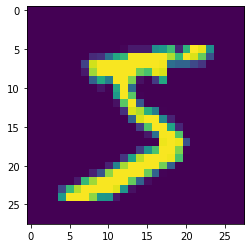

In [7]:
plt.imshow(single_image)

In [10]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Convert the labels to categories

We need to convert the labels to categorical (since they are categories expressed in numeric way, the model may mistakenly see it as just a continuous numeric value, not category)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
Y_train.shape

(60000,)

In [15]:
y_example = to_categorical(Y_train)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(Y_test)
y_cat_train = to_categorical(Y_train)

In [19]:
y_cat_train.shape, y_cat_test.shape

((60000, 10), (10000, 10))

#### Normalize the training data

In [20]:
single_image.min(), single_image.max()

(0, 255)

We need to normalize the values (make the values between 0 and 1)

In [21]:
X_train = X_train/255

In [22]:
X_test = X_test/255

In [23]:
scaled_image = X_train[0]
scaled_image.min(), scaled_image.max()

(0.0, 1.0)

#### Reshape the data

We need to add one more dimention to let the CNN know we are dealing with one channel

In [24]:
X_train.shape

(60000, 28, 28)

In [26]:
#batch_size, width, height, color_channels
X_train = X_train.reshape(60000, 28, 28, 1)

In [27]:
X_train.shape

(60000, 28, 28, 1)

In [28]:
X_test.shape

(10000, 28, 28)

In [30]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [31]:
X_test.shape

(10000, 28, 28, 1)

### Creating a Model

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(4,4),
                 input_shape=(28,28,1),
                 activation="relu"))

model.add(MaxPool2D(pool_size=(2,2))) #half the kernel_size
model.add(Flatten())
#after flatten can add dense layers
model.add(Dense(128, activation="relu"))

#output layer / 1 neuron per class
model.add(Dense(10, activation="softmax"))


#compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

#### Set up an EarlyStopping callback

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

### Train the model

In [40]:
model.fit(X_train, 
          y_cat_train,
          epochs=10,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1411 - accuracy: 0.9577 - val_loss: 0.0637 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0464 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0449 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0381 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0382 - val_accuracy: 0.9881


### Evaluate the Model

In [41]:
metrics = pd.DataFrame(model.history.history)

In [42]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.141082,0.957683,0.063660,0.9801
1,0.047533,0.985233,0.046388,0.9835
2,0.030085,0.990300,0.044895,0.9851
3,0.020410,0.993450,0.038067,0.9874
4,0.013999,0.995233,0.038163,0.9881


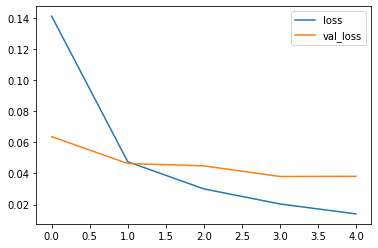

In [43]:
metrics[['loss', 'val_loss']].plot()

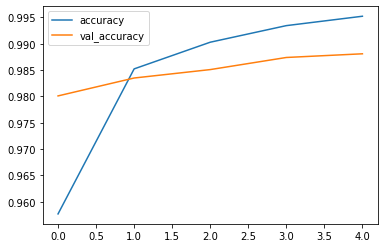

In [44]:
metrics[['accuracy', 'val_accuracy']].plot()

In [45]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0382 - accuracy: 0.9881


[0.03816259652376175, 0.988099992275238]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
predictions = np.argmax(model.predict(X_test), axis=1)

In [52]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
confusion_matrix(Y_test, predictions)

array([[ 973,    0,    1,    0,    0,    0,    3,    3,    0,    0],
       [   0, 1130,    1,    1,    1,    0,    2,    0,    0,    0],
       [   1,    2, 1019,    1,    2,    0,    0,    4,    3,    0],
       [   0,    0,    2, 1002,    0,    2,    0,    1,    2,    1],
       [   0,    0,    1,    0,  976,    0,    2,    0,    0,    3],
       [   1,    1,    0,    7,    0,  881,    0,    0,    1,    1],
       [   2,    1,    0,    0,    4,    6,  942,    0,    3,    0],
       [   0,    1,   10,    0,    0,    0,    0, 1013,    1,    3],
       [   4,    0,    5,    2,    0,    1,    0,    1,  957,    4],
       [   0,    2,    0,    0,   10,    2,    0,    5,    2,  988]])

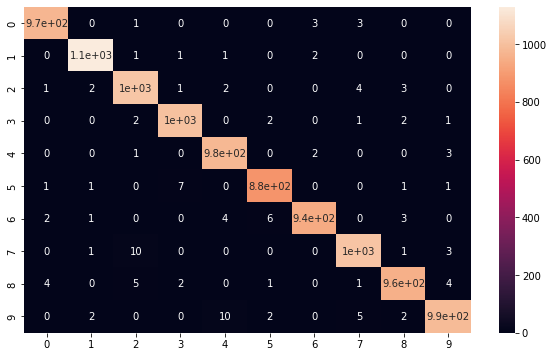

In [54]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True)

#### Predict a single image

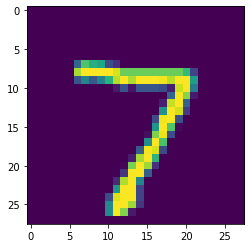

In [55]:
my_number = X_test[0]
plt.imshow(my_number.reshape(28,28))

In [57]:
# num_images, width, height, color_channels
np.argmax(model.predict(my_number.reshape(1, 28,28,1)))

7

## CNN on CIFAR (RGB IMAGES)

### Load in and Prepare the Data

In [58]:
from tensorflow.keras.datasets import cifar10

In [59]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [60]:
x_train.shape

(50000, 32, 32, 3)

In [62]:
x_train[0].shape

(32, 32, 3)

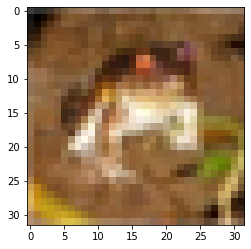

In [63]:
plt.imshow(x_train[0])

In [64]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [65]:
# Normalize the data
x_train = x_train/255

In [66]:
x_test = x_test/255

In [68]:
from tensorflow.keras.utils import to_categorical

In [69]:
y_categorical_train = to_categorical(y_train,10)
y_categorical_test = to_categorical(y_test,10)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

### Build a model

In [72]:
model = Sequential()

#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 input_shape=(32,32,3),
                 activation="relu"))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))
#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 input_shape=(32,32,3),
                 activation="relu"))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))



model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

#### Add Early Stopping

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Fit the model

In [76]:
model.fit(x_train, y_categorical_train,
          epochs=20,
          validation_data=(x_test, y_categorical_test),
          callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4847 - accuracy: 0.4653 - val_loss: 1.2701 - val_accuracy: 0.5477
Epoch 2/20
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1634 - accuracy: 0.5904 - val_loss: 1.0855 - val_accuracy: 0.6232
Epoch 3/20
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0087 - accuracy: 0.6451 - val_loss: 0.9856 - val_accuracy: 0.6587
Epoch 4/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9092 - accuracy: 0.6831 - val_loss: 0.9851 - val_accuracy: 0.6558
Epoch 5/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8205 - accuracy: 0.7151 - val_loss: 1.0207 - val_accuracy: 0.6528
Epoch 6/20
1563/1563 [==============================] - 45s 28ms/step - loss: 0.7427 - accuracy: 0.7404 - val_loss: 0.9489 - val_accuracy: 0.6812
Epoch 7/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6702 - accuracy: 0.7633 - val_loss: 0.9798 -

### Evaluate the model

In [77]:
metrics = pd.DataFrame(model.history.history)

In [78]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.484661,0.46532,1.270076,0.5477
1,1.163398,0.59040,1.085479,0.6232
2,1.008697,0.64512,0.985645,0.6587
3,0.909161,0.68306,0.985117,0.6558
4,0.820526,0.71506,1.020703,0.6528
5,0.742731,0.74042,0.948885,0.6812
6,0.670225,0.76330,0.979763,0.6796
7,0.608530,0.78588,0.985798,0.6729


In [79]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

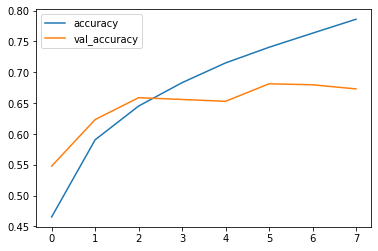

In [81]:
metrics[['accuracy', 'val_accuracy']].plot()

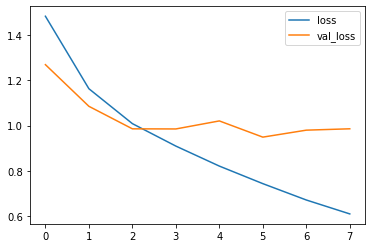

In [82]:
metrics[['loss','val_loss']].plot()

In [83]:
model.evaluate(x_test, y_categorical_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9858 - accuracy: 0.6729


[0.9857984185218811, 0.6729000210762024]

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [90]:
predictions[0]

3

In [91]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1000
           1       0.86      0.72      0.78      1000
           2       0.63      0.50      0.56      1000
           3       0.46      0.60      0.52      1000
           4       0.61      0.67      0.64      1000
           5       0.58      0.58      0.58      1000
           6       0.79      0.68      0.74      1000
           7       0.78      0.68      0.72      1000
           8       0.69      0.86      0.76      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



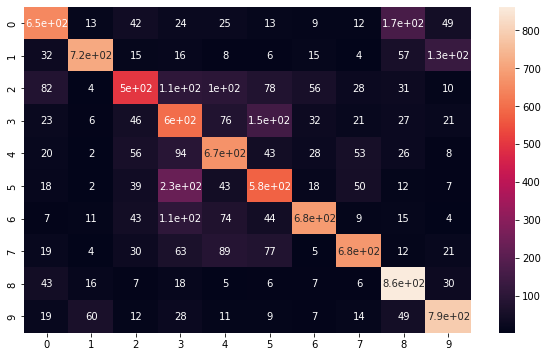

In [92]:
import seaborn as sns

plt.figure(figsize=(10,6))

sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

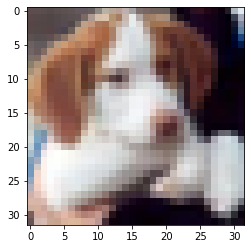

In [96]:
my_img = x_test[16] #data already scaled
plt.imshow(my_img)

In [98]:
y_test[16]

array([5], dtype=uint8)

In [99]:
np.argmax(model.predict(my_img.reshape(1, 32, 32, 3)),axis=1)

array([5])